In [1]:
import nest
import numpy as np
import matplotlib.pyplot as plt

## NodeCollections

In [2]:
nodes_alpha = nest.Create('iaf_psc_alpha', 10)
print(nodes_alpha)

NodeCollection(metadata=None, model=iaf_psc_alpha, size=10, first=1, last=10)


In [3]:
print(nodes_alpha[2:8])

NodeCollection(metadata=None, model=iaf_psc_alpha, size=6, first=3, last=8)


In [4]:
print(nodes_alpha[::2])

NodeCollection(metadata=None,
               model=proxynode, size=5, first=0, last=9, step=2)


In [5]:
nodes_exp = nest.Create('iaf_psc_exp', 5)
nodes = nodes_alpha + nodes_exp
print(nodes)

NodeCollection(metadata=None,
               model=iaf_psc_alpha, size=10, first=1, last=10;
               model=iaf_psc_exp, size=5, first=11, last=15)


In [6]:
nodes = nest.NodeCollection([1, 2, 3, 12, 13, 14])
print(nodes)

NodeCollection(metadata=None,
               model=iaf_psc_alpha, size=3, first=1, last=3;
               model=iaf_psc_exp, size=3, first=12, last=14)


In [7]:
nodes_alpha==nodes_exp

False

In [8]:
nodes_exp==nest.NodeCollection([11, 12, 13, 14, 15])

True

In [9]:
9 in nodes_exp

False

In [10]:
12 in nodes_exp

True

In [11]:
nodes_exp.tolist()

[11, 12, 13, 14, 15]

In [12]:
nodes_exp[:3].get()

{'C_m': (250.0, 250.0, 250.0),
 'Ca': (0.0, 0.0, 0.0),
 'E_L': (-70.0, -70.0, -70.0),
 'I_e': (0.0, 0.0, 0.0),
 'V_m': (-70.0, -70.0, -70.0),
 'V_reset': (-70.0, -70.0, -70.0),
 'V_th': (-55.0, -55.0, -55.0),
 'archiver_length': (0, 0, 0),
 'beta_Ca': (0.001, 0.001, 0.001),
 'delta': (0.0, 0.0, 0.0),
 'element_type': ('neuron', 'neuron', 'neuron'),
 'frozen': (False, False, False),
 'global_id': (11, 12, 13),
 'local': (True, True, True),
 'model': ('iaf_psc_exp', 'iaf_psc_exp', 'iaf_psc_exp'),
 'node_uses_wfr': (False, False, False),
 'post_trace': (2.38613707e-316, 2.38613707e-316, 2.38613707e-316),
 'recordables': (('I_syn_ex',
   'I_syn_in',
   'V_m',
   'weighted_spikes_ex',
   'weighted_spikes_in'),
  ('I_syn_ex', 'I_syn_in', 'V_m', 'weighted_spikes_ex', 'weighted_spikes_in'),
  ('I_syn_ex', 'I_syn_in', 'V_m', 'weighted_spikes_ex', 'weighted_spikes_in')),
 'rho': (0.01, 0.01, 0.01),
 'synaptic_elements': ({}, {}, {}),
 't_ref': (2.0, 2.0, 2.0),
 't_spike': (-1.0, -1.0, -1.0),
 't

In [13]:
nodes = nest.Create('iaf_psc_alpha', 10, {'V_m': -55.})
nodes.get('V_m')

(-55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0)

In [14]:
nodes.V_m

(-55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0)

In [15]:
nodes.set({'V_reset': [-65.0 + n for n in range(10)]})
# or
nodes.set(V_reset=[-65.0 + n for n in range(10)])
# or
nodes.V_reset = [-65.0 + n for n in range(10)]

nodes.get(['V_m', 'V_reset'])

{'V_m': (-55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0, -55.0),
 'V_reset': (-65.0,
  -64.0,
  -63.0,
  -62.0,
  -61.0,
  -60.0,
  -59.0,
  -58.0,
  -57.0,
  -56.0)}

In [16]:
for n in nodes[::3]:
    print(n)

NodeCollection(metadata=None, model=iaf_psc_alpha, size=1, first=16)
NodeCollection(metadata=None, model=iaf_psc_alpha, size=1, first=19)
NodeCollection(metadata=None, model=iaf_psc_alpha, size=1, first=22)
NodeCollection(metadata=None, model=iaf_psc_alpha, size=1, first=25)


In [17]:
nest.ResetKernel()
try:
    nodes.get()  # raises InvalidNodeCollection
except nest.kernel.NESTErrors.InvalidNodeCollection as e:
    print('Raised error:', e)

Raised error: ('InvalidNodeCollection in GetStatus_g: ', 'InvalidNodeCollection', 'GetStatus_g', ': ')


## Parameterization

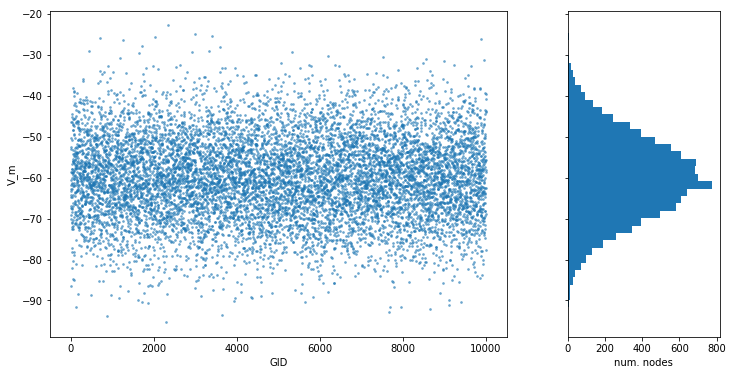

In [18]:
nest.ResetKernel()

n = nest.Create('iaf_psc_alpha', 10000)
n.V_m = nest.random.normal(mean=-60., std=10.)

gids = n.get('global_id')
v_m = n.get('V_m')
fig, ax = plt.subplots(figsize=(12, 6), 
                       gridspec_kw={'width_ratios': [3, 1]}, 
                       ncols=2,
                       sharey=True)
ax[0].plot(gids, v_m, '.', alpha=0.5, ms=3.5)
ax[0].set_xlabel('GID');
ax[1].hist(v_m, bins=40, orientation='horizontal');
ax[1].set_xlabel('num. nodes');
ax[0].set_ylabel('V_m');

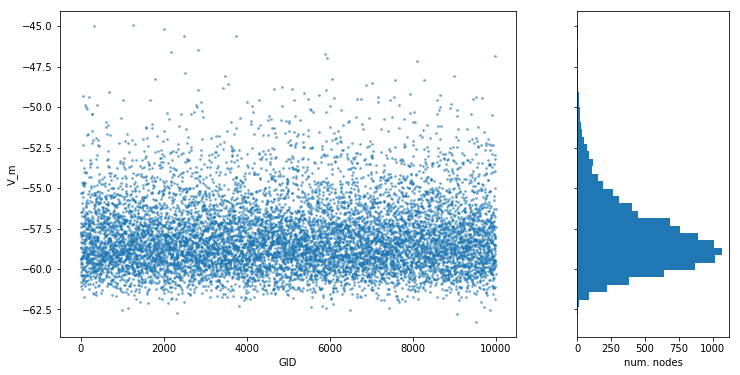

In [19]:
nest.ResetKernel()

n = nest.Create('iaf_psc_alpha', 10000)
n.V_m = -60 + 2*nest.random.exponential() + nest.random.normal()

gids = n.global_id
v_m = n.V_m
fig, ax = plt.subplots(figsize=(12, 6), 
                       gridspec_kw={'width_ratios': [3, 1]}, 
                       ncols=2,
                       sharey=True)
ax[0].plot(gids, v_m, '.', alpha=0.5, ms=3.5)
ax[0].set_xlabel('GID');
ax[1].hist(v_m, bins=40, orientation='horizontal');
ax[1].set_xlabel('num. nodes');
ax[0].set_ylabel('V_m');

## Connecting

In [20]:
nest.ResetKernel()

n = nest.Create('iaf_psc_alpha', 200)
nest.Connect(n, n, syn_spec={'weight': nest.random.exponential(beta=0.4)})

conns = nest.GetConnections()
weights = conns.weight
print(weights[:10])

[0.21088282805971265, 0.15657555664733017, 0.6554309097531537, 0.37681366198069244, 0.7558248149006221, 0.4509586111884833, 0.0849105474425321, 1.5868739883995078, 0.04972731121045684, 0.2983155067483565]


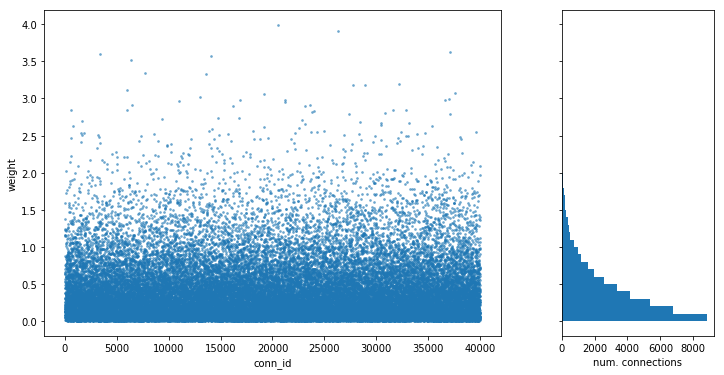

In [21]:
conn_id = range(len(weights))
fig, ax = plt.subplots(figsize=(12, 6), 
                       gridspec_kw={'width_ratios': [3, 1]}, 
                       ncols=2,
                       sharey=True)
ax[0].plot(conn_id, weights, '.', alpha=0.5, ms=3.5)
ax[0].set_xlabel('conn_id');
ax[1].hist(weights, bins=40, orientation='horizontal');
ax[1].set_xlabel('num. connections');
ax[0].set_ylabel('weight');

## Spatial networks

In [22]:
nest.ResetKernel()

grid_nodes = nest.Create('iaf_psc_alpha',
                         positions=nest.spatial.grid(shape=[2, 2], center=[1., 1.]))

positions = [[1., 1.], [2., 2.], [3., 3.], [4., 4.]]
free_nodes = nest.Create('iaf_psc_alpha', 4,
                         positions=nest.spatial.free(positions))
print(grid_nodes)

NodeCollection(metadata=spatial, model=iaf_psc_alpha, size=4, first=1, last=4)


In [23]:
grid_nodes.V_m

(-70.0, -70.0, -70.0, -70.0)

In [24]:
grid_nodes.spatial

{'center': (1.0, 1.0),
 'edge_wrap': False,
 'extent': (1.0, 1.0),
 'network_size': 4,
 'shape': (2, 2)}

In [25]:
free_nodes.spatial

{'center': (2.5, 2.5),
 'edge_wrap': False,
 'extent': (3.2, 3.2),
 'network_size': 4,
 'positions': ((1.0, 1.0), (2.0, 2.0), (3.0, 3.0), (4.0, 4.0))}

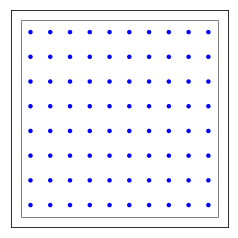

In [26]:
grid_nodes = nest.Create('iaf_psc_alpha',
                         positions=nest.spatial.grid(shape=[10, 8]))
nest.PlotLayer(grid_nodes);

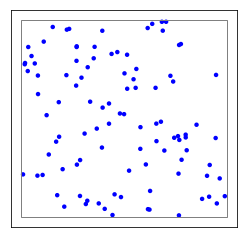

In [27]:
free_nodes = nest.Create('iaf_psc_alpha', 100,
                         positions=nest.spatial.free(nest.random.uniform(min=0., max=10.), num_dimensions=2))
nest.PlotLayer(free_nodes);

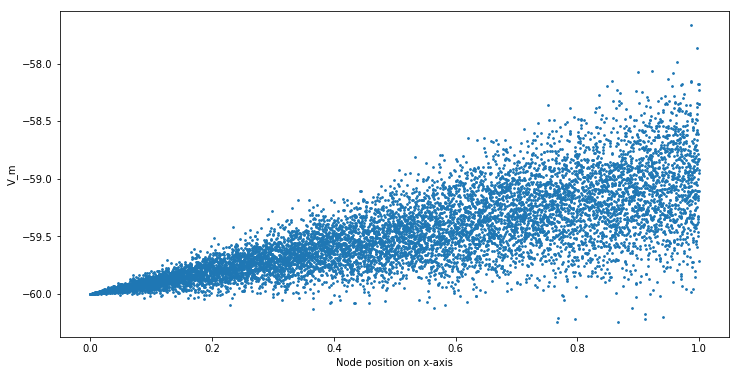

In [28]:
nest.ResetKernel()

positions = nest.spatial.free([[x, 0.5*x] for x in np.linspace(0, 1.0, 10000)])
nodes = nest.Create('iaf_psc_alpha', positions=positions)

nodes.V_m = -60 + nest.spatial.pos.x + (0.4 * nest.spatial.pos.x * nest.random.normal())

node_pos = np.array(nest.GetPosition(nodes))
node_pos[:,1]
v_m = nodes.V_m

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(node_pos[:,0], v_m, '.', ms=3.5)
ax.set_xlabel('Node position on x-axis')
ax.set_ylabel('V_m');

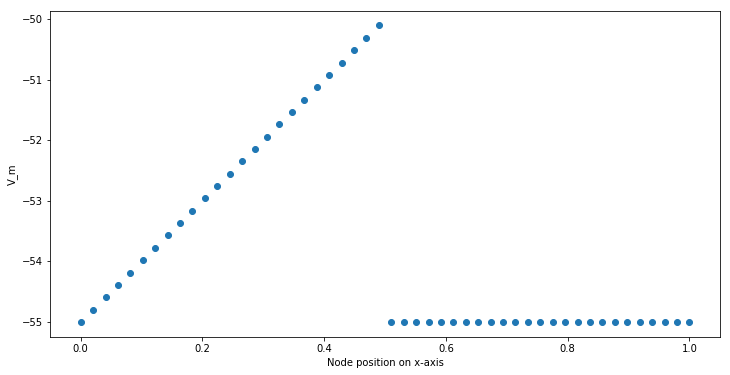

In [29]:
nest.ResetKernel()

positions = nest.spatial.free([[x, 0.5*x] for x in np.linspace(0, 1.0, 50)])
nodes = nest.Create('iaf_psc_alpha', positions=positions)

nodes.set(V_m=nest.logic.conditional(nest.spatial.pos.x < 0.5,
                                     -55 + 10*nest.spatial.pos.x,
                                     -55))

node_pos = np.array(nest.GetPosition(nodes))
node_pos[:,1]
v_m = nodes.V_m

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(node_pos[:,0], v_m, 'o')
ax.set_xlabel('Node position on x-axis')
ax.set_ylabel('V_m');

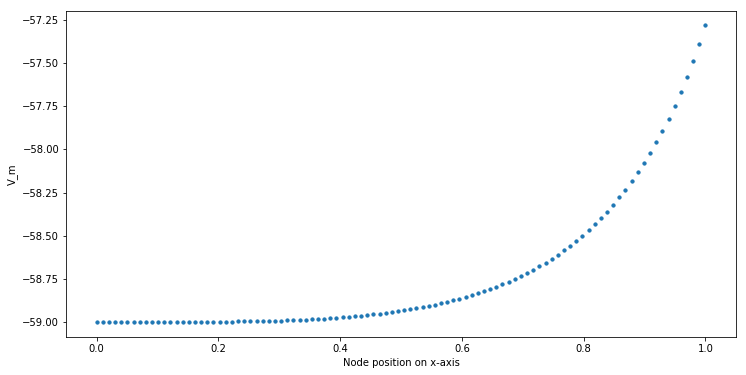

In [30]:
nest.ResetKernel()

positions = nest.spatial.free([[x, 0.5*x] for x in np.linspace(0, 1.0, 100)])
nodes = nest.Create('iaf_psc_alpha', positions=positions)

parameter = -60 + nest.math.exp(nest.spatial.pos.x**4)
# Also available:
#   - nest.math.sin()
#   - nest.math.cos()

nodes.V_m = parameter

node_pos = np.array(nest.GetPosition(nodes))
node_pos[:,1]
v_m = nodes.V_m

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(node_pos[:,0], v_m, '.', ms=6.5)
ax.set_xlabel('Node position on x-axis')
ax.set_ylabel('V_m');

### Connecting with spatial NodeCollections

In [31]:
nest.ResetKernel()

positions = nest.spatial.free(nest.random.uniform(), num_dimensions=2)
nodes = nest.Create('iaf_psc_alpha', 10, positions=positions)

nest.Connect(nodes, nodes)

len(nest.GetConnections())

100

#### Connection rules

| Old  | New  |
|---|---|
| `convergent`  |  `pairwise_bernoulli` and `use_on_source=True`  |
| `convergent` and `num_connections`  | `fixed_indegree` |
| `divergent`  | `pairwise_bernoulli`  |
| `divergent` and `num_connections`  | `fixed_outdegree`  |

In [32]:
nest.ResetKernel()

positions = nest.spatial.free(nest.random.uniform(), num_dimensions=2)
nodes = nest.Create('iaf_psc_alpha', 10, positions=positions)

nest.Connect(nodes, nodes, conn_spec={'rule': 'fixed_indegree', 'indegree': 2})

print('Num. connections:', len(nest.GetConnections()))

Num. connections: 20


In [33]:
nest.ResetKernel()

positions = nest.spatial.free(nest.random.uniform(), num_dimensions=2)
nodes = nest.Create('iaf_psc_alpha', 10, positions=positions)

nest.Connect(nodes, nodes, conn_spec={'rule': 'pairwise_bernoulli',
                                      'p': 0.5,
                                      'use_on_source': True})

print('Num. connections:', len(nest.GetConnections()))

Num. connections: 58


Num. connections: 32


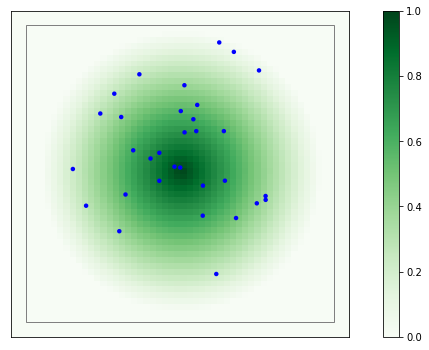

In [34]:
nest.ResetKernel()

positions = nest.spatial.free(nest.random.uniform(min=-1., max=1.), num_dimensions=2)
nodes = nest.Create('iaf_psc_alpha', 100, positions=positions)
center_node = nest.Create('iaf_psc_alpha', 1, positions=nest.spatial.free([[0., 0.]]))

parameter = 1 - nest.spatial.distance

nest.Connect(center_node, nodes, conn_spec={'rule': 'pairwise_bernoulli',
                                      'p': parameter})

print('Num. connections:', len(nest.GetConnections()))
fig = plt.figure(figsize=(12, 6))
nest.PlotTargets(center_node, nodes, probability_parameter=parameter, fig=fig);

## New recording backend (NESTio)

In [35]:
nest.ResetKernel()

nodes = nest.Create('iaf_psc_alpha', 10)
poisson_generator = nest.Create('poisson_generator')
spike_detector = nest.Create('spike_detector')

poisson_generator.rate = 100000.
spike_detector.record_to = 'memory'  # default

nest.Connect(poisson_generator, nodes)
nest.Connect(nodes, spike_detector)

nest.Simulate(100.)

spike_detector.events

{'senders': array([ 2,  4,  8,  1,  5,  6,  7,  9,  3, 10,  4,  8,  5,  6,  2,  7,  9,
        10,  1,  3,  4,  5,  8,  6,  7,  1,  2,  9, 10,  3,  5,  2,  4,  8,
         6,  1,  7,  9, 10,  3,  5,  8,  2,  4,  6,  1,  7,  9, 10,  3,  4,
         5,  2,  6,  8,  1,  7, 10,  9,  3,  5,  2,  4,  1,  6,  8]),
 'times': array([ 16.8,  17. ,  16.9,  17.5,  17.1,  17.3,  17.6,  17.5,  18.6,
         18.1,  30. ,  29.7,  30.7,  30.9,  31.5,  31.6,  31.5,  31.3,
         32.1,  32.9,  43.5,  43.5,  43.7,  45. ,  45. ,  45.3,  45.2,
         45.7,  45.7,  47.1,  57. ,  57.9,  57.3,  57.3,  58.3,  59.1,
         59.1,  59.6,  59.8,  61.2,  70.8,  70.7,  71.8,  71.2,  71.7,
         72.5,  73.4,  74. ,  73.4,  74.6,  84.8,  85. ,  85.1,  85.3,
         85.1,  86.4,  86.9,  86.2,  87.4,  88.9,  97.6,  98.1,  98.9,
         99.8,  99.6,  99.2])}

In [36]:
spike_detector.get('events', 'senders')

array([ 2,  4,  8,  1,  5,  6,  7,  9,  3, 10,  4,  8,  5,  6,  2,  7,  9,
       10,  1,  3,  4,  5,  8,  6,  7,  1,  2,  9, 10,  3,  5,  2,  4,  8,
        6,  1,  7,  9, 10,  3,  5,  8,  2,  4,  6,  1,  7,  9, 10,  3,  4,
        5,  2,  6,  8,  1,  7, 10,  9,  3,  5,  2,  4,  1,  6,  8])

In [37]:
nest.ResetKernel()

nest.SetKernelStatus({'overwrite_files': True})

nodes = nest.Create('iaf_psc_alpha', 10)
poisson_generator = nest.Create('poisson_generator')
spike_detector = nest.Create('spike_detector')

poisson_generator.rate = 100000.
spike_detector.record_to = 'ascii'  # writes to file

nest.Connect(poisson_generator, nodes)
nest.Connect(nodes, spike_detector)

nest.Simulate(100.)

print(spike_detector.filenames)

('spike_detector-12-0.dat',)


In [38]:
less spike_detector-12-0.dat